In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


In [61]:
file_paths = [
    "../data/cbb.csv",
    "../data/cbb13.csv",
    "../data/cbb14.csv",
    "../data/cbb15.csv",
    "../data/cbb16.csv",
    "../data/cbb17.csv",
    "../data/cbb18.csv",
    "../data/cbb19.csv",
    "../data/cbb20.csv",
    "../data/cbb21.csv",
    "../data/cbb22.csv",
    "../data/cbb23.csv",
    "../data/cbb24.csv",
]

# Loop through each dataset and print the first few rows
for info in file_paths:
        # Load the dataset
        data = pd.read_csv(info)
        
        # Print the dataset name and the first 5 rows
        print(f"Dataset: {info}")
        print(data.head())
        print("\n" + "="*50 + "\n")

Dataset: ../data/cbb.csv
             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  
1  ...  22.4  54.8  44.7  36.5  37.5   59.3  11.3         2ND   1.0  2015  
2  ...  30.0  54.7  46.8  35.2  33.2   65.9   6.9         2ND   3.0  2018  
3  ...  36.6  52.8  41.9  36.5  29.7   67.5   7.0         2ND   3.0  2019  
4  ...  26.9  56.3  40.0  38.2  29.0   71.5   7.7         2ND   1.0  2017  

[5 rows x 24 columns]


Dataset: ../data/cbb13.csv
    

In [62]:
# Initialize an empty list to store datasets
all_data = []

# Loop through each dataset and print the first few rows
for info in file_paths:
    # Load the dataset
    data = pd.read_csv(info)
    
    # Add a "YEAR" column if missing
    if "YEAR" not in data.columns:
        try:
            # Extract year from the file name
            year = int(info.split("/")[-1].replace("cbb", "").replace(".csv", ""))
            data["YEAR"] = year
        except ValueError:
            print(f"Unable to determine year for {info}")
            continue

    # Append the dataset to the list
    all_data.append(data)
    
    # Print the dataset name and the first 5 rows
    print(f"Dataset: {info}")
    print(data.head())
    print("\n" + "="*50 + "\n")

# Combine all datasets into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Print combined data info
print("Combined Dataset:")
print(combined_data.info())
print("\nFirst 5 rows of combined data:")
print(combined_data.head())


Dataset: ../data/cbb.csv
             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  
1  ...  22.4  54.8  44.7  36.5  37.5   59.3  11.3         2ND   1.0  2015  
2  ...  30.0  54.7  46.8  35.2  33.2   65.9   6.9         2ND   3.0  2018  
3  ...  36.6  52.8  41.9  36.5  29.7   67.5   7.0         2ND   3.0  2019  
4  ...  26.9  56.3  40.0  38.2  29.0   71.5   7.7         2ND   1.0  2017  

[5 rows x 24 columns]


Dataset: ../data/cbb13.csv
    

In [63]:
missing_values = combined_data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Fill missing numerical values with column mean
numerical_columns = combined_data.select_dtypes(include=[np.number]).columns
combined_data[numerical_columns] = combined_data[numerical_columns].fillna(combined_data[numerical_columns].mean())


# Fill missing categorical values with the most common value
categorical_columns = combined_data.select_dtypes(include=['object', 'category']).columns
combined_data[categorical_columns] = combined_data[categorical_columns].fillna(combined_data[categorical_columns].mode().iloc[0])

# Verify missing values are handled
print("Missing Values After Handling:")
print(combined_data.isnull().sum())

Missing values in each column:
EFG_O          362
EFG_D          720
POSTSEASON    6401
SEED          6333
RK            7046
EFGD_D        7403
EFG%          7399
EFGD%         7399
dtype: int64
Missing Values After Handling:
TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
RK            0
EFGD_D        0
EFG%          0
EFGD%         0
dtype: int64


In [64]:
# Check for duplicates
duplicates_count = combined_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [65]:
# Convert categorical columns to 'category' type for optimization
categorical_columns = ["CONF", "POSTSEASON"]
for col in categorical_columns:
    if col in combined_data.columns:
        combined_data[col] = combined_data[col].astype("category")

# Verify data types
print(combined_data.dtypes)

TEAM            object
CONF          category
G                int64
W                int64
ADJOE          float64
ADJDE          float64
BARTHAG        float64
EFG_O          float64
EFG_D          float64
TOR            float64
TORD           float64
ORB            float64
DRB            float64
FTR            float64
FTRD           float64
2P_O           float64
2P_D           float64
3P_O           float64
3P_D           float64
ADJ_T          float64
WAB            float64
POSTSEASON    category
SEED           float64
YEAR             int64
RK             float64
EFGD_D         float64
EFG%           float64
EFGD%          float64
dtype: object


In [66]:
# Define Target Variable
postseason_mapping = {
    "R64": 0,
    "R32": 1,
    "S16": 2,
    "E8": 3,
    "F4": 4,
    "2ND": 5,
    "Champions": 6
}

# Map POSTSEASON to numerical labels
combined_data["POSTSEASON_LABEL"] = combined_data["POSTSEASON"].map(postseason_mapping)

# Drop rows with missing POSTSEASON values
combined_data = combined_data.dropna(subset=["POSTSEASON_LABEL"])

# Verify the mapping
print(combined_data[["POSTSEASON", "POSTSEASON_LABEL"]].head())

  POSTSEASON  POSTSEASON_LABEL
0        2ND               5.0
1        2ND               5.0
2        2ND               5.0
3        2ND               5.0
4        2ND               5.0


In [67]:
numeric_data = combined_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

target_correlation = correlation_matrix["POSTSEASON_LABEL"].sort_values(ascending=False)
print("Correlation with POSTSEASON_LABEL:")
print(target_correlation)

relevant_features = target_correlation[(target_correlation > 0.1) | (target_correlation < -0.1)].index
print("Relevant Features After Filtering:", relevant_features)

Correlation with POSTSEASON_LABEL:
POSTSEASON_LABEL    1.000000e+00
WAB                 4.620632e-01
W                   4.406951e-01
ADJOE               4.313220e-01
BARTHAG             4.021698e-01
G                   3.275961e-01
EFG_O               2.568913e-01
2P_O                2.253602e-01
ORB                 1.882918e-01
3P_O                1.844998e-01
TORD                6.382324e-02
FTR                 2.558183e-02
YEAR                2.318426e-02
EFG%                7.214415e-16
RK                 -2.502990e-17
EFGD%              -5.158469e-16
ADJ_T              -3.110810e-02
EFGD_D             -6.487724e-02
DRB                -8.010986e-02
FTRD               -1.380622e-01
3P_D               -1.868900e-01
TOR                -1.954854e-01
2P_D               -2.468292e-01
EFG_D              -2.657525e-01
ADJDE              -3.755260e-01
SEED               -4.652760e-01
Name: POSTSEASON_LABEL, dtype: float64
Relevant Features After Filtering: Index(['POSTSEASON_LABEL', 'WAB',

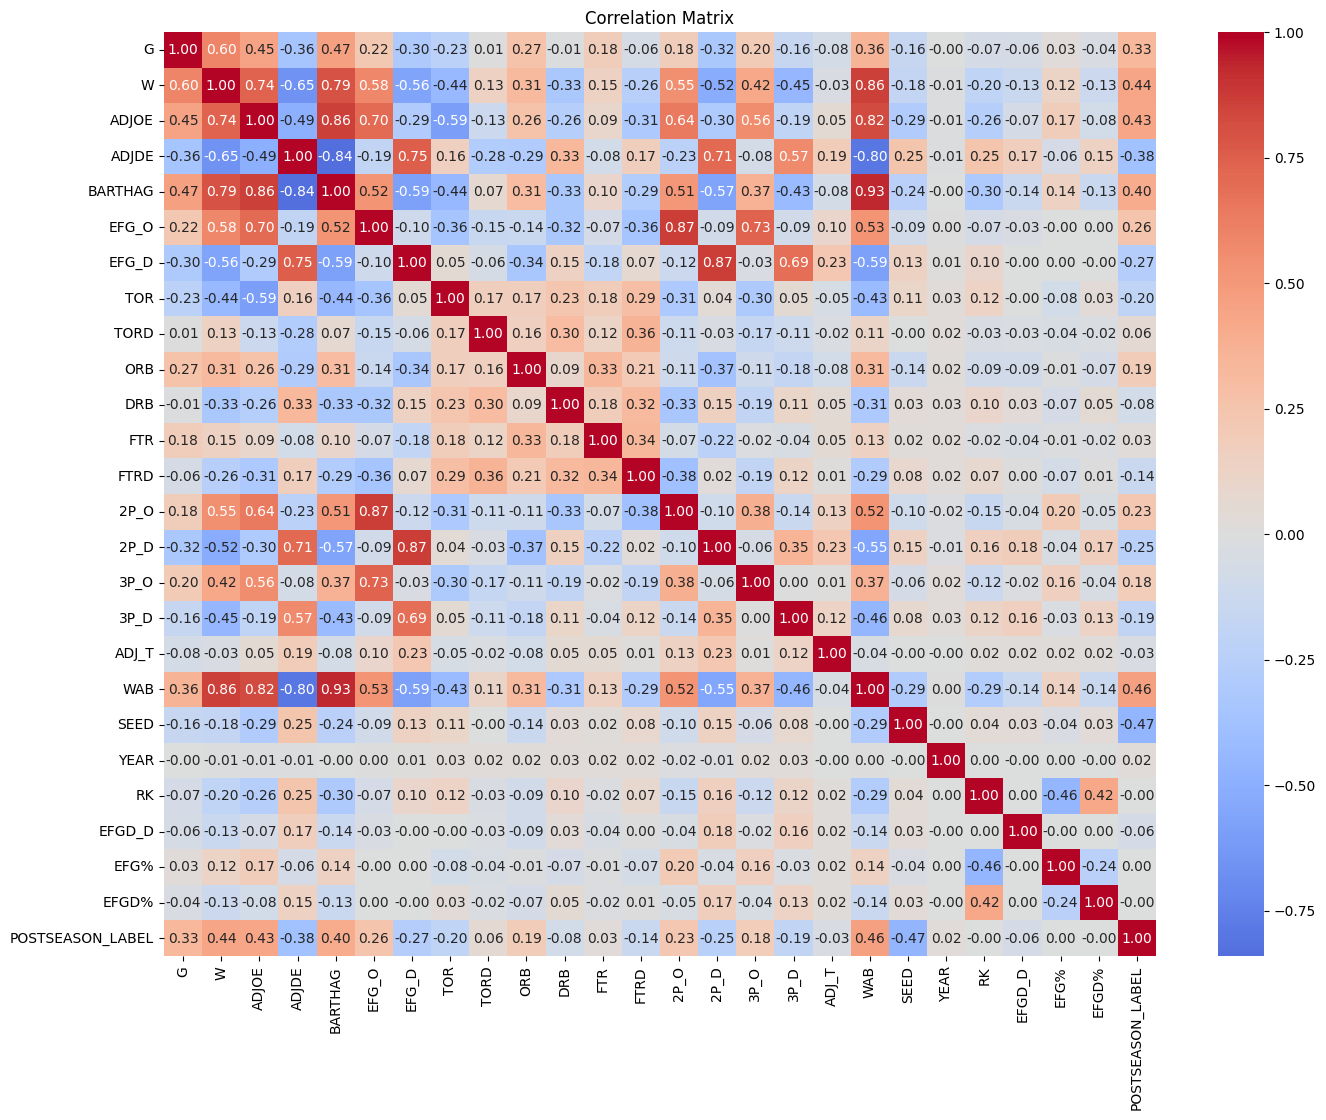

In [68]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [69]:
# Extract features and target
X = combined_data[relevant_features].drop(columns=["POSTSEASON_LABEL"])
y = combined_data["POSTSEASON_LABEL"]

# Check the shape of the data
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

Features Shape: (7681, 16)
Target Shape: (7681,)


In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 6144
Test set size: 1537


In [71]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1409
         1.0       0.44      0.25      0.32        64
         2.0       0.21      0.16      0.18        32
         3.0       0.00      0.00      0.00        16
         4.0       0.00      0.00      0.00         8
         5.0       0.17      0.25      0.20         4
         6.0       0.00      0.00      0.00         4

    accuracy                           0.92      1537
   macro avg       0.25      0.24      0.24      1537
weighted avg       0.90      0.92      0.91      1537

Confusion Matrix:
[[1396   11    2    0    0    0    0]
 [  44   16    3    0    1    0    0]
 [  19    6    5    1    0    1    0]
 [   3    0   10    0    0    3    0]
 [   1    3    2    2    0    0    0]
 [   0    0    2    0    1    1    0]
 [   0    0    0    0    3    1    0]]
AUC-ROC Score: 0.9733077396171078


C:\Users\Kunal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kunal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kunal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

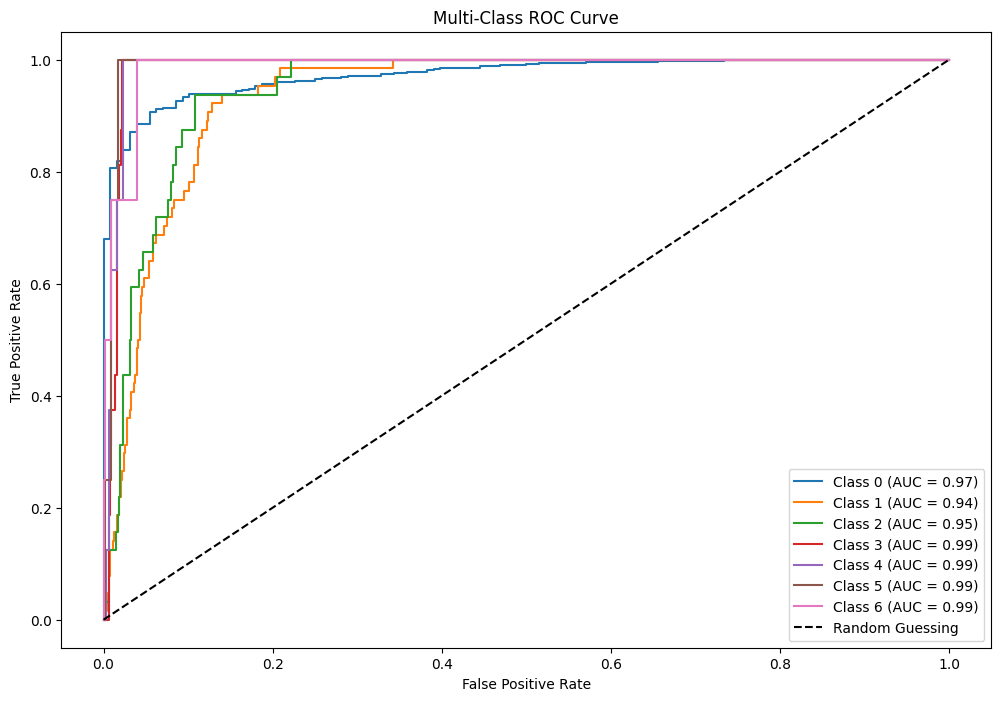

In [72]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
print(f"AUC-ROC Score: {roc_auc}")

# Plot ROC Curve
plt.figure(figsize=(12, 8))

for i in range(7):  # Assuming 7 classes
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="best")
plt.show()